# Data Import and Preprocessing
Import necessary libraries (pandas, numpy, sklearn). Load the three CSV files (Bitcoin, Gold, S&P500). Handle missing values, align dates, and create a combined dataset.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the three CSV files
btc_data = pd.read_csv('../../CSV/df_btc.csv')
gold_data = pd.read_csv('../../CSV/df_gold.csv')
sp500_data = pd.read_csv('../../CSV/df_sp500.csv')

# Convert Date columns to datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Create a simple merged dataset
combined_data = pd.merge(btc_data[['Date', 'Close']], 
                        gold_data[['Date', 'Close']], 
                        on='Date', 
                        suffixes=('_btc', '_gold'))

combined_data = pd.merge(combined_data, 
                        sp500_data[['Date', 'Close']], 
                        on='Date')
combined_data = combined_data.rename(columns={'Close': 'Close_sp500'})

# Handle missing values
combined_data.fillna(method='ffill', inplace=True)

# Prepare features (X) and target (y)
X = combined_data[['Close_gold', 'Close_sp500']]
y = combined_data['Close_btc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Square Error: {rmse}")
print(f"R² Score: {model.score(X_test, y_test)}")
print("\nCoefficients:")
print(f"Gold: {model.coef_[0]:.2f}")
print(f"SP500: {model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Root Mean Square Error: 11110.338372335314
R² Score: 0.7645167653279805

Coefficients:
Gold: 2.99
SP500: 24.57
Intercept: -73966.48


C:\Users\Jules\AppData\Local\Temp\ipykernel_40248\231767448.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


# Data Visualization and Correlation Analysis
Use matplotlib/seaborn to visualize the relationships between variables. Calculate correlation matrix to understand relationships between Bitcoin, Gold, and S&P500.

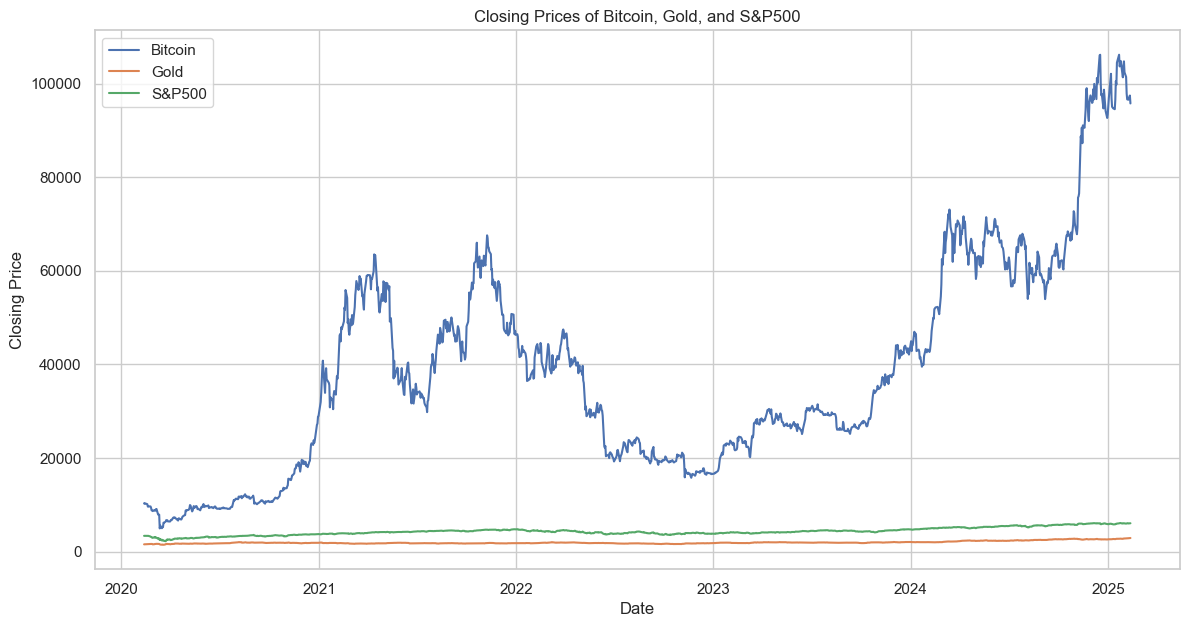

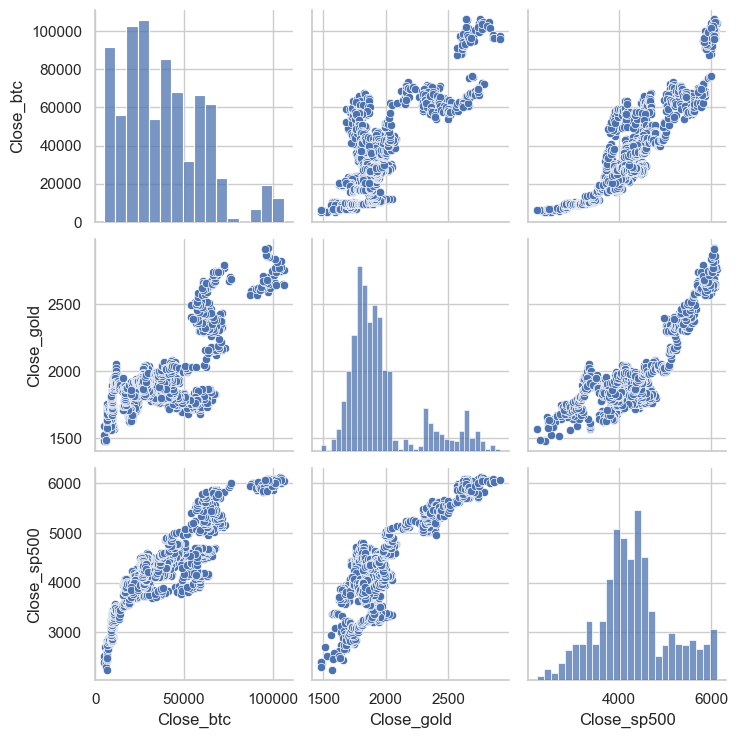

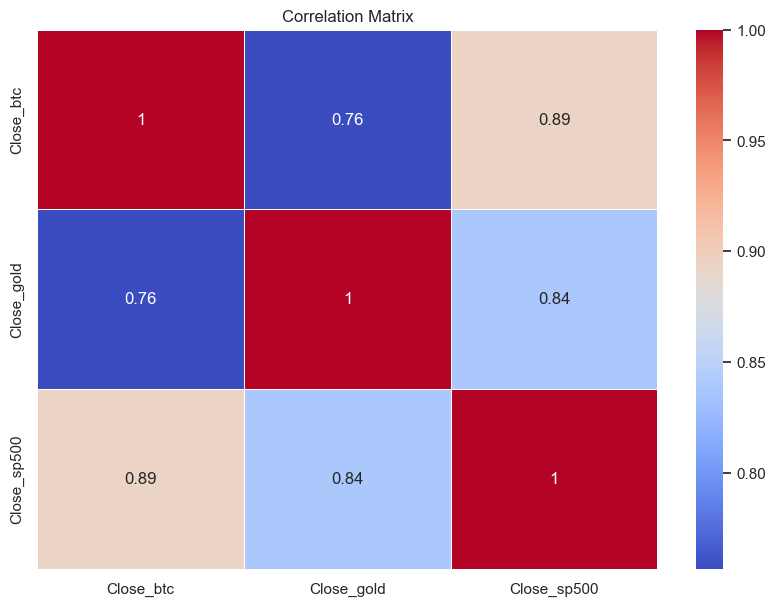

In [6]:
# Data Visualization and Correlation Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the closing prices of Bitcoin, Gold, and S&P500
plt.figure(figsize=(14, 7))
plt.plot(combined_data['Date'], combined_data['Close_btc'], label='Bitcoin')
plt.plot(combined_data['Date'], combined_data['Close_gold'], label='Gold')
plt.plot(combined_data['Date'], combined_data['Close_sp500'], label='S&P500')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Bitcoin, Gold, and S&P500')
plt.legend()
plt.show()

# Pairplot to visualize relationships between variables
sns.pairplot(combined_data[['Close_btc', 'Close_gold', 'Close_sp500']])
plt.show()

# Calculate the correlation matrix
correlation_matrix = combined_data[['Close_btc', 'Close_gold', 'Close_sp500']].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
combined_data.corr()

,Date,Close_btc,Close_gold,Close_sp500
Date,1.000000,0.636011,0.763508,0.849472
Close_btc,0.636011,1.000000,0.756827,0.893313
Close_gold,0.763508,0.756827,1.000000,0.838621
Close_sp500,0.849472,0.893313,0.838621,1.000000


# Feature Engineering and Dataset Preparation
Create features from Gold and S&P500 data. Split the data into training and testing sets. Scale the features using StandardScaler.

In [8]:
# Feature Engineering and Dataset Preparation

from sklearn.preprocessing import StandardScaler

# Create features and target variable
X = combined_data[['Close_gold', 'Close_sp500']]
y = combined_data['Close_btc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training features
pd.DataFrame(X_train_scaled, columns=['Close_gold', 'Close_sp500']).head()

,Close_gold,Close_sp500
0,-0.775970,-0.303959
1,-0.571331,-0.864186
2,0.176577,0.964544
3,2.094200,1.633779
4,-0.640240,0.159604


# Multiple Linear Regression Model
Initialize and train the LinearRegression model from sklearn using Gold and S&P500 as features to predict Bitcoin prices.

Mean Squared Error: 123439618.7477866
              Coefficient
Close_gold     859.826447
Close_sp500  19505.030245


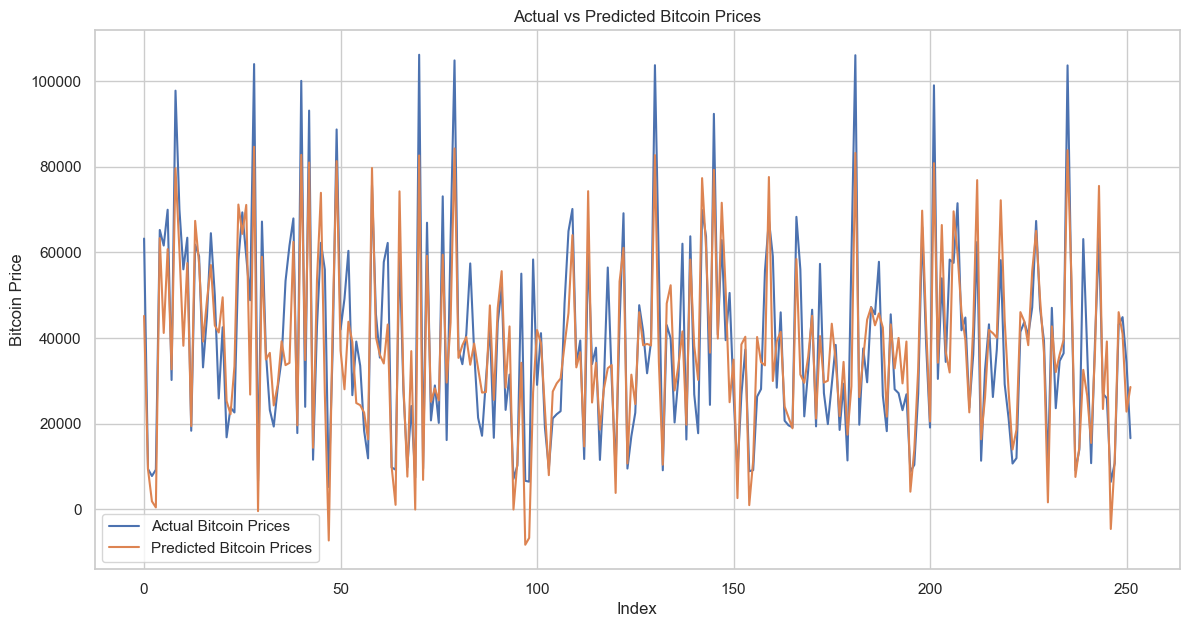

In [9]:
# Multiple Linear Regression Model

# Initialize the LinearRegression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train_scaled, y_train)

# Predict the Bitcoin prices using the testing data
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Display the mean squared error
print(f"Mean Squared Error: {mse}")

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plot the actual vs predicted Bitcoin prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Bitcoin Prices')
plt.plot(y_pred, label='Predicted Bitcoin Prices')
plt.xlabel('Index')
plt.ylabel('Bitcoin Price')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.legend()
plt.show()

# Model Evaluation and Predictions
Calculate R-squared score and other metrics. Make predictions on test set. Visualize actual vs predicted values. Analyze model coefficients.

R-squared: 0.7645167653279804
Mean Absolute Error: 8634.102203878208
R-squared: 0.7645167653279804


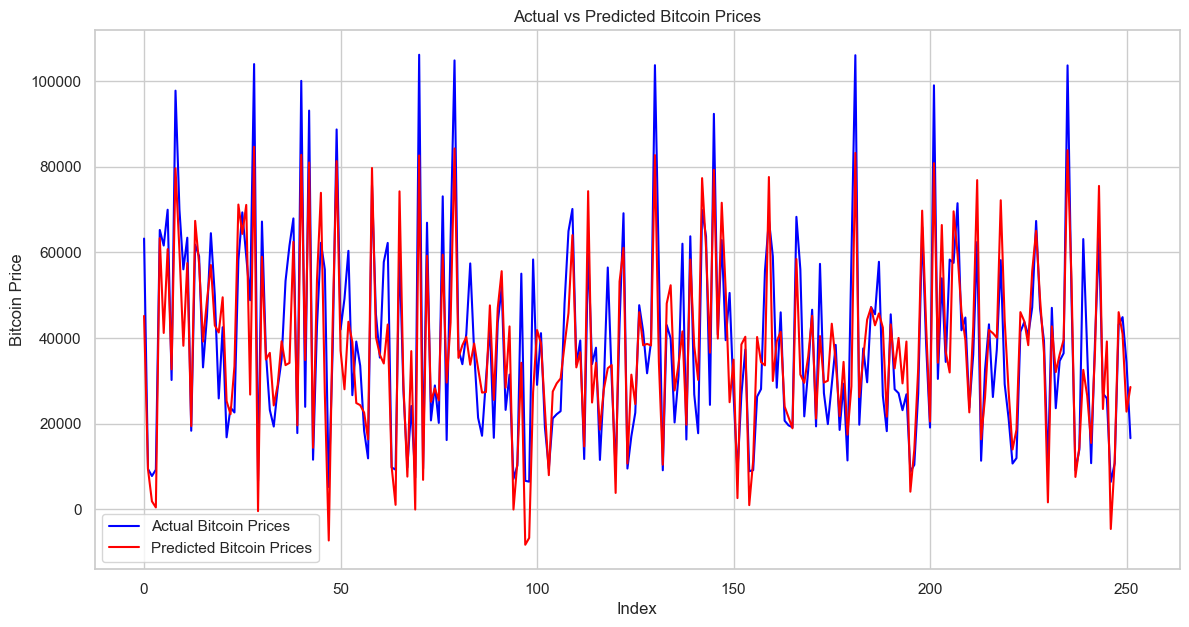

              Coefficient
Close_gold     859.826447
Close_sp500  19505.030245


In [10]:
# Model Evaluation and Predictions

# Calculate R-squared score
r_squared = model.score(X_test_scaled, y_test)
print(f"R-squared: {r_squared}")

# Calculate additional metrics
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Visualize actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Bitcoin Prices', color='blue')
plt.plot(y_pred, label='Predicted Bitcoin Prices', color='red')
plt.xlabel('Index')
plt.ylabel('Bitcoin Price')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.legend()
plt.show()

# Analyze model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)